<a href="https://colab.research.google.com/github/sdivyakolu/Pytorch_Tutorial/blob/main/AI_Capstone_project__PredictCountryBasedOn_Image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Model Development Traning ( SOLUTIONING THE PROBLEM : Most important step)

import torch
import torch.nn as nn
import torch.nn.functional as F
#import torchvision.datasets as Country211
import torchvision.transforms as transforms
from torchvision import datasets
import torchvision.models as models
from torch.utils.data import dataloader
from torch.utils.data import random_split
from torch.utils.data import Subset

from torch import optim
import torch.optim as optim

import matplotlib.pyplot as plt

In [2]:
#Load the Country211 Dataset
from torchvision.datasets import Country211
from torchvision import transforms
from torch.utils.data import DataLoader

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])

train_dataset = Country211(root='./data', split='train', transform=transform, download=True)
test_dataset = Country211(root='./data', split='test', transform=transform)

#Un-Optimized DataLoader
#train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
#Optimized DataLoader -
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True,
                          num_workers=4, pin_memory=True)
test_loader = DataLoader(test_dataset, batch_size=32)

100%|██████████| 11.0G/11.0G [17:14<00:00, 10.6MB/s]


In [3]:
#Define a Simple CNN Model
#Define neural network , __init__ and forward functions.

import torch.nn as nn
import torch.nn.functional as F

class CountryRecognitionClassifier(nn.Module):
    def __init__(self, num_classes=211):
        super(CountryRecognitionClassifier, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, 3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(16, 32, 3, padding=1)
        self.fc1 = nn.Linear(32 * 56 * 56, 512)
        self.fc2 = nn.Linear(512, num_classes)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 32 * 56 * 56)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

In [7]:
#Train the Model
import torch
import torch.optim as optim

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = CountryRecognitionClassifier().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
epochs=10
validation_loss = 0.0
correct = 0
total = 0
for epoch in range(epochs):  # adjust epochs as needed
    model.train()
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        validation_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    print(f"Epoch {epoch+1}: Train Loss = {loss/len(train_loader):.4f}, "
      f"Val Loss = {validation_loss/len(train_loader):.4f}, "
      f"Accuracy = {100*correct/total:.2f}%")

Epoch 1: Train Loss = 0.0055, Val Loss = 5.3485, Accuracy = 1.01%
Epoch 2: Train Loss = 0.0053, Val Loss = 10.5589, Accuracy = 1.66%
Epoch 3: Train Loss = 0.0044, Val Loss = 15.3993, Accuracy = 3.06%
Epoch 4: Train Loss = 0.0065, Val Loss = 18.7413, Accuracy = 9.42%
Epoch 5: Train Loss = 0.0000, Val Loss = 20.1187, Accuracy = 21.27%
Epoch 6: Train Loss = 0.0004, Val Loss = 20.6324, Accuracy = 32.47%
Epoch 7: Train Loss = 0.0002, Val Loss = 20.8982, Accuracy = 41.29%
Epoch 8: Train Loss = 0.0006, Val Loss = 21.0810, Accuracy = 48.12%
Epoch 9: Train Loss = 0.0000, Val Loss = 21.2231, Accuracy = 53.52%
Epoch 10: Train Loss = 0.0000, Val Loss = 21.3340, Accuracy = 57.90%


In [8]:
#Evaluate on Test Set
model.eval()
correct = 0
total = 0

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f"Accuracy: {100 * correct / total:.2f}%")

Accuracy: 1.82%


Predicted: RS, Actual: AD


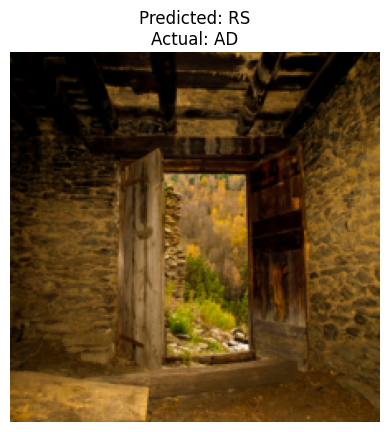

['AD', 'AE', 'AF', 'AG', 'AI', 'AL', 'AM', 'AO', 'AQ', 'AR', 'AT', 'AU', 'AW', 'AX', 'AZ', 'BA', 'BB', 'BD', 'BE', 'BF', 'BG', 'BH', 'BJ', 'BM', 'BN', 'BO', 'BQ', 'BR', 'BS', 'BT', 'BW', 'BY', 'BZ', 'CA', 'CD', 'CF', 'CH', 'CI', 'CK', 'CL', 'CM', 'CN', 'CO', 'CR', 'CU', 'CV', 'CW', 'CY', 'CZ', 'DE', 'DK', 'DM', 'DO', 'DZ', 'EC', 'EE', 'EG', 'ES', 'ET', 'FI', 'FJ', 'FK', 'FO', 'FR', 'GA', 'GB', 'GD', 'GE', 'GF', 'GG', 'GH', 'GI', 'GL', 'GM', 'GP', 'GR', 'GS', 'GT', 'GU', 'GY', 'HK', 'HN', 'HR', 'HT', 'HU', 'ID', 'IE', 'IL', 'IM', 'IN', 'IQ', 'IR', 'IS', 'IT', 'JE', 'JM', 'JO', 'JP', 'KE', 'KG', 'KH', 'KN', 'KP', 'KR', 'KW', 'KY', 'KZ', 'LA', 'LB', 'LC', 'LI', 'LK', 'LR', 'LT', 'LU', 'LV', 'LY', 'MA', 'MC', 'MD', 'ME', 'MF', 'MG', 'MK', 'ML', 'MM', 'MN', 'MO', 'MQ', 'MR', 'MT', 'MU', 'MV', 'MW', 'MX', 'MY', 'MZ', 'NA', 'NC', 'NG', 'NI', 'NL', 'NO', 'NP', 'NZ', 'OM', 'PA', 'PE', 'PF', 'PG', 'PH', 'PK', 'PL', 'PR', 'PS', 'PT', 'PW', 'PY', 'QA', 'RE', 'RO', 'RS', 'RU', 'RW', 'SA', 'SB', 'SC

In [15]:
# Load an image from the Country211 test set
image, label = test_dataset[0]  # Get the first sample
image = image.unsqueeze(0).to(device)  # Add batch dimension

# Predict
model.eval()
with torch.no_grad():
    output = model(image)
    _, predicted = torch.max(output, 1)

# Show result
actual = test_dataset.classes[label]
predicted_country = test_dataset.classes[predicted.item()]
print(f"Predicted: {predicted_country}, Actual: {actual}")

# Visualize
import matplotlib.pyplot as plt
plt.imshow(image[0].cpu().permute(1, 2, 0))
plt.title(f"Predicted: {predicted_country}\nActual: {actual}")
plt.axis('off')
plt.show()


In [ ]:
%pip install pycountry

In [19]:
import pycountry

def get_country_name(code):
    country = pycountry.countries.get(alpha_2=code)
    return country.name if country else code

Image 1: Predicted = RS, Actual = AD,Predicted Full-Country: Serbia


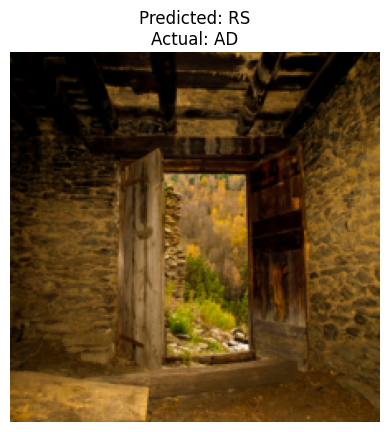

Image 2: Predicted = LV, Actual = AD,Predicted Full-Country: Latvia


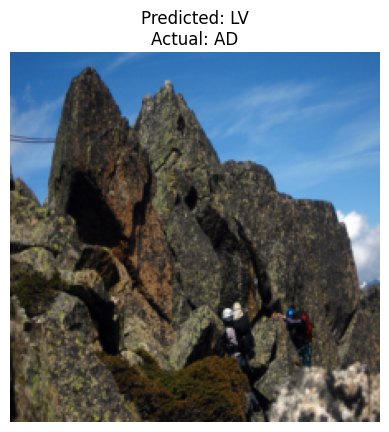

Image 3: Predicted = PH, Actual = AD,Predicted Full-Country: Philippines


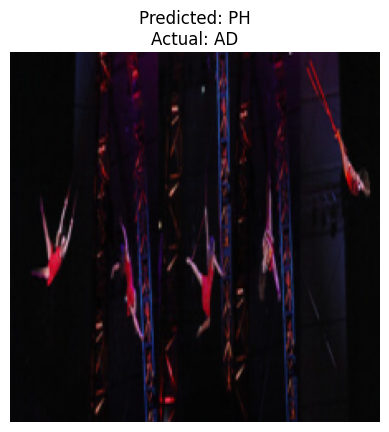

Image 4: Predicted = FR, Actual = AD,Predicted Full-Country: France


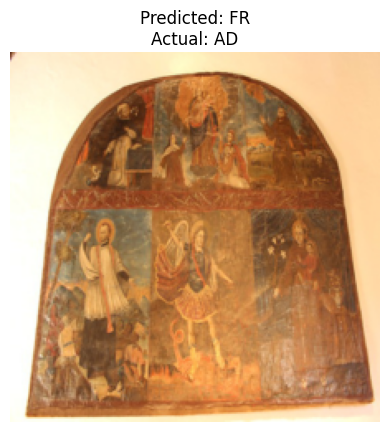

Image 5: Predicted = VG, Actual = AD,Predicted Full-Country: Virgin Islands, British


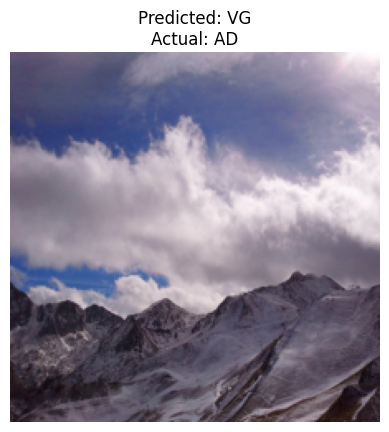

Image 6: Predicted = BY, Actual = AD,Predicted Full-Country: Belarus


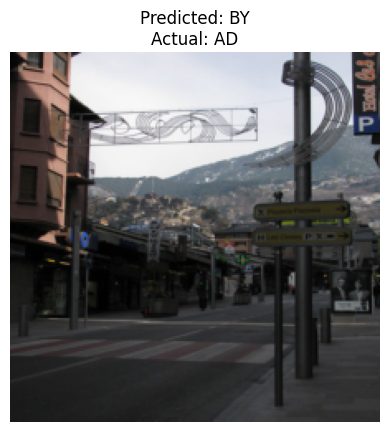

Image 7: Predicted = CM, Actual = AD,Predicted Full-Country: Cameroon


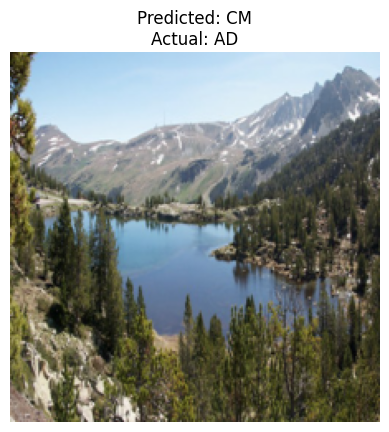

Image 8: Predicted = DE, Actual = AD,Predicted Full-Country: Germany


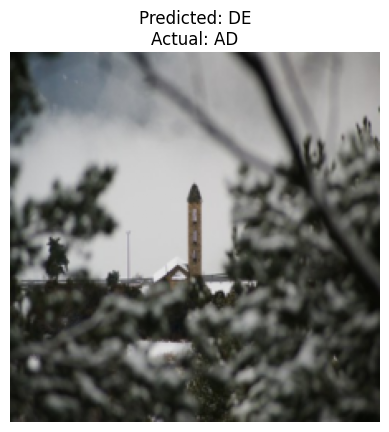

Image 9: Predicted = GG, Actual = AD,Predicted Full-Country: Guernsey


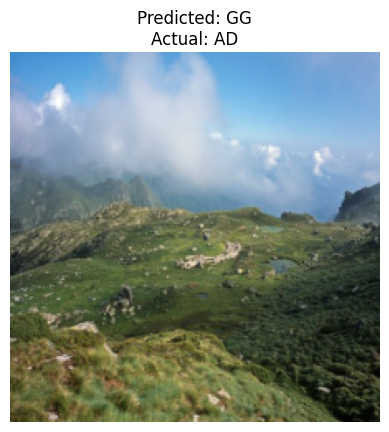

Image 10: Predicted = NO, Actual = AD,Predicted Full-Country: Norway


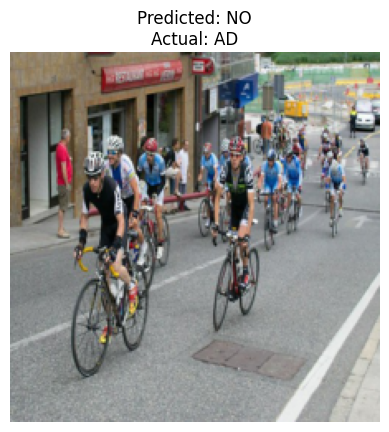

Image 11: Predicted = FO, Actual = AD,Predicted Full-Country: Faroe Islands


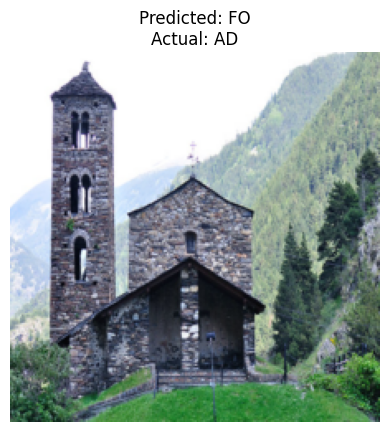

Image 12: Predicted = ZW, Actual = AD,Predicted Full-Country: Zimbabwe


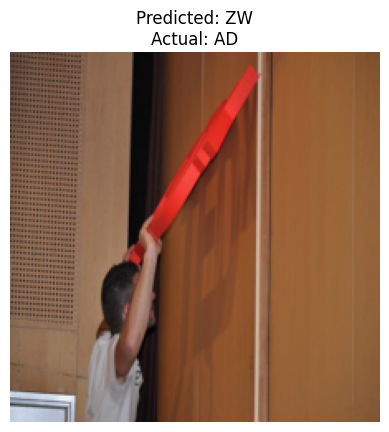

Image 13: Predicted = CZ, Actual = AD,Predicted Full-Country: Czechia


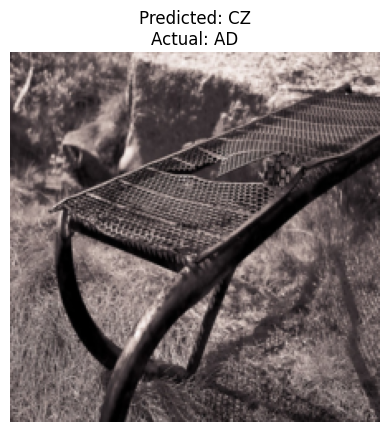

Image 14: Predicted = RE, Actual = AD,Predicted Full-Country: Réunion


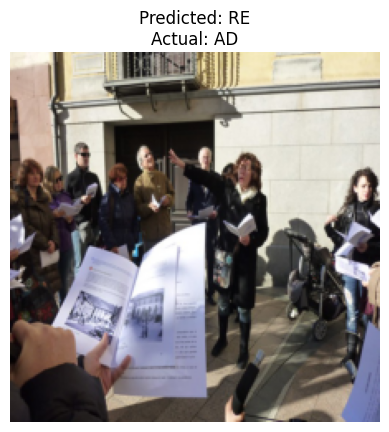

Image 15: Predicted = WS, Actual = AD,Predicted Full-Country: Samoa


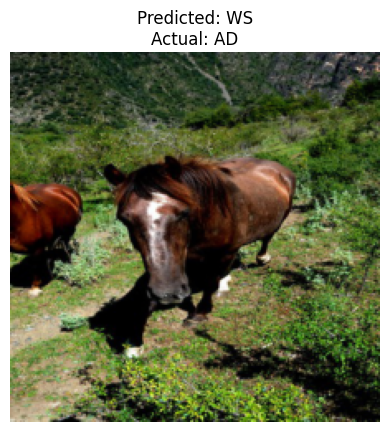

Image 16: Predicted = ID, Actual = AD,Predicted Full-Country: Indonesia


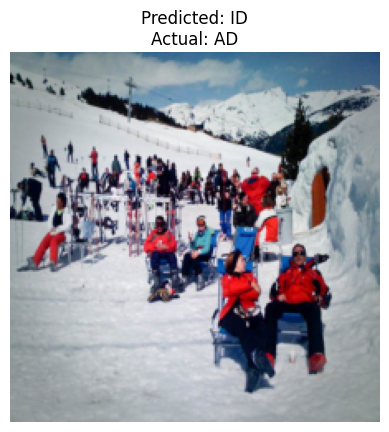

Image 17: Predicted = DM, Actual = AD,Predicted Full-Country: Dominica


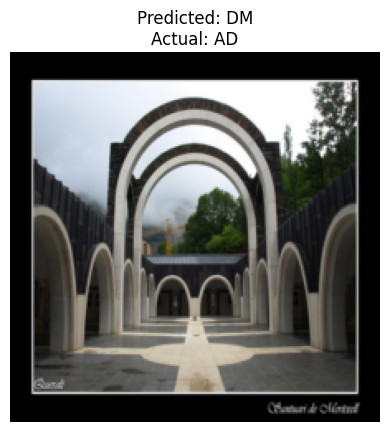

Image 18: Predicted = BE, Actual = AD,Predicted Full-Country: Belgium


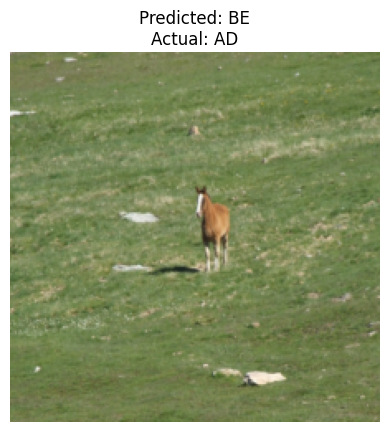

Image 19: Predicted = MF, Actual = AD,Predicted Full-Country: Saint Martin (French part)


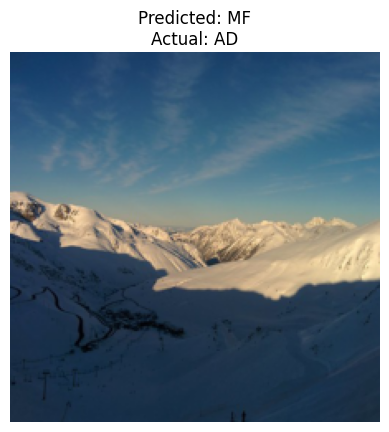

Image 20: Predicted = AU, Actual = AD,Predicted Full-Country: Australia


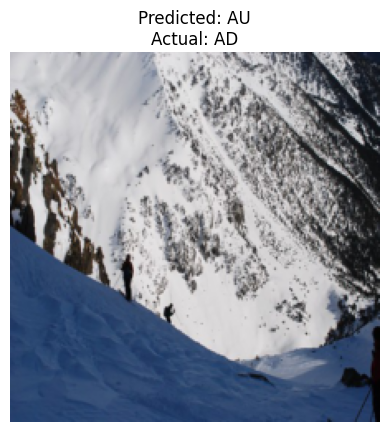

Image 21: Predicted = TW, Actual = AD,Predicted Full-Country: Taiwan, Province of China


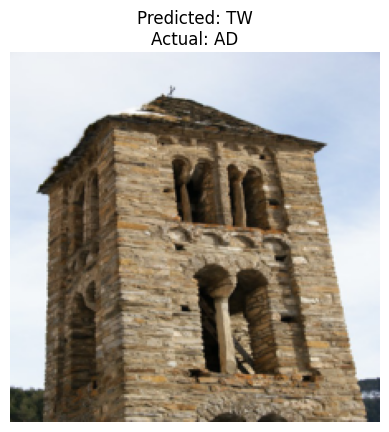

Image 22: Predicted = VN, Actual = AD,Predicted Full-Country: Viet Nam


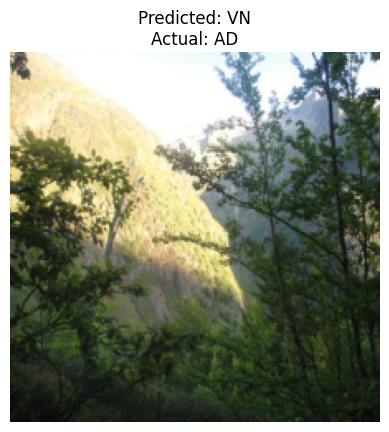

Image 23: Predicted = MC, Actual = AD,Predicted Full-Country: Monaco


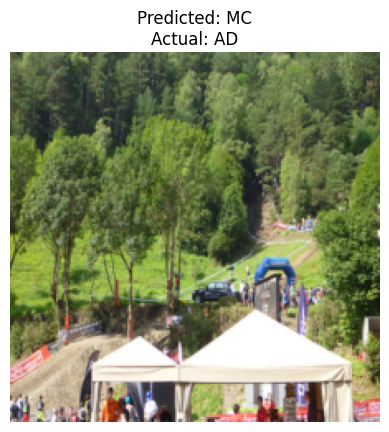

Image 24: Predicted = GU, Actual = AD,Predicted Full-Country: Guam


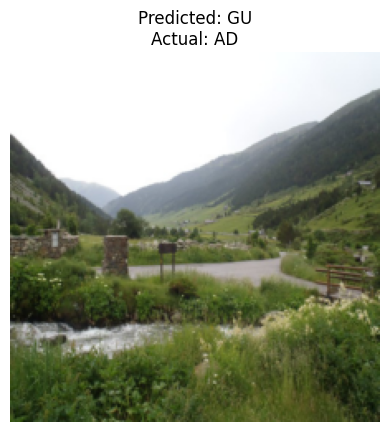

Image 25: Predicted = AG, Actual = AD,Predicted Full-Country: Antigua and Barbuda


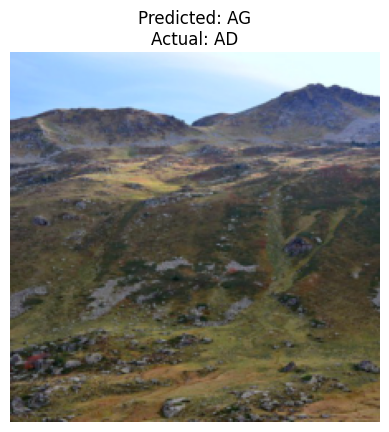

Image 26: Predicted = CR, Actual = AD,Predicted Full-Country: Costa Rica


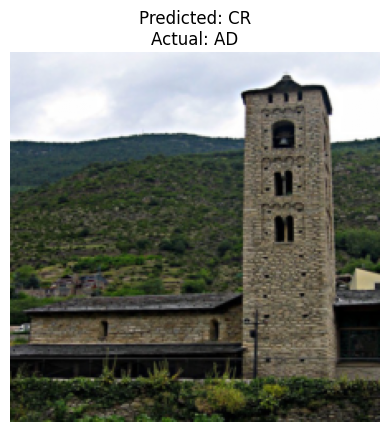

Image 27: Predicted = SX, Actual = AD,Predicted Full-Country: Sint Maarten (Dutch part)


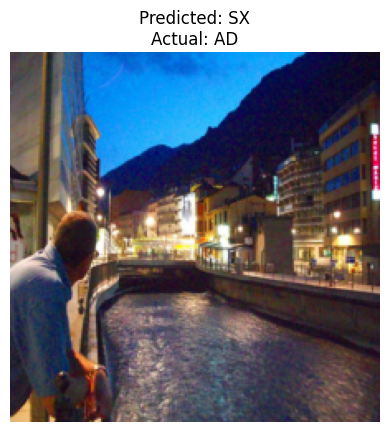

Image 28: Predicted = ID, Actual = AD,Predicted Full-Country: Indonesia


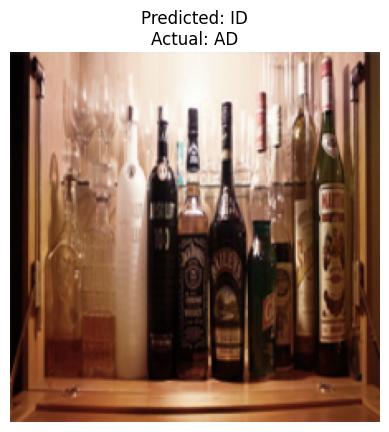

Image 29: Predicted = IL, Actual = AD,Predicted Full-Country: Israel


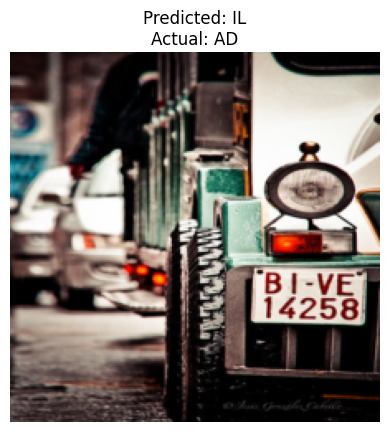

Image 30: Predicted = KH, Actual = AD,Predicted Full-Country: Cambodia


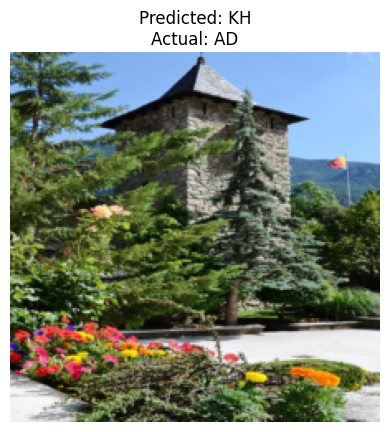

In [21]:
import torch
import matplotlib.pyplot as plt

model.eval()

for i in range(30):
    image, label = test_dataset[i]
    image_batch = image.unsqueeze(0).to(device)  # Add batch dimension

    with torch.no_grad():
        output = model(image_batch)
        _, predicted = torch.max(output, 1)

    actual = test_dataset.classes[label]
    predicted_country = test_dataset.classes[predicted.item()]
    full_name = get_country_name(predicted_country)
    print(f"Image {i+1}: Predicted = {predicted_country}, Actual = {actual},Predicted Full-Country: {full_name}")

    # Visualize
    plt.imshow(image.permute(1, 2, 0))
    plt.title(f"Predicted: {predicted_country}\nActual: {actual}")
    plt.axis('off')
    plt.show()


In [10]:
#Define a Prediction & Visualization Class
import torch
import matplotlib.pyplot as plt
from torchvision.datasets import Country211
from torchvision import transforms
from torch.utils.data import DataLoader, Subset

class CountryPredictor:
    def __init__(self, model, dataset_root='./data', split='test', device=None):
        self.device = device or torch.device("cuda" if torch.cuda.is_available() else "cpu")
        self.model = model.to(self.device)
        self.model.eval()

        self.transform = transforms.Compose([
            transforms.Resize((224, 224)),
            transforms.ToTensor()
        ])

        self.dataset = Country211(root=dataset_root, split=split, transform=self.transform)
        self.class_names = self.dataset.classes  # List of country names

    def predict_and_visualize(self, sample_count=10):
        indices = list(range(sample_count))
        subset = Subset(self.dataset, indices)
        loader = DataLoader(subset, batch_size=1)

        with torch.no_grad():
            for i, (image, label) in enumerate(loader):
                image = image.to(self.device)
                output = self.model(image)
                _, predicted = torch.max(output, 1)

                true_country = self.class_names[label.item()]
                predicted_country = self.class_names[predicted.item()]

                print(f"Image {i+1}: Predicted = {predicted_country}, Actual = {true_country}")

                # Visualize
                plt.imshow(image[0].cpu().permute(1, 2, 0))
                plt.title(f"Predicted: {predicted_country}\nActual: {true_country}")
                plt.axis('off')
                plt.show()


In [11]:
# Assuming you have a trained model named `model`
predictor = CountryPredictor(model=model, dataset_root='./data', split='test')

In [26]:
import torch
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

def plot_confusion_matrix(model, dataloader, class_names, device=None, display_classes=None):
    device = device or torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.eval()
    model.to(device)

    all_preds = []
    all_labels = []

    with torch.no_grad():
        for images, labels in dataloader:
            images = images.to(device)
            labels = labels.to(device)
            outputs = model(images)
            _, preds = torch.max(outputs, 1)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    # Compute confusion matrix
    cm = confusion_matrix(all_labels, all_preds)

    if display_classes:
        # Get indices of the classes to display
        display_indices = [class_names.index(cls) for cls in display_classes if cls in class_names]
        # Filter the confusion matrix
        cm_filtered = cm[np.ix_(display_indices, display_indices)]
        # Filter the class names
        filtered_class_names = [class_names[i] for i in display_indices]
    else:
        cm_filtered = cm
        filtered_class_names = class_names


    # Plot heatmap
    plt.figure(figsize=(12, 10))
    sns.heatmap(cm_filtered, annot=True, fmt='d', cmap='Blues',
                xticklabels=filtered_class_names, yticklabels=filtered_class_names)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix - Country211")
    plt.tight_layout()
    plt.show()

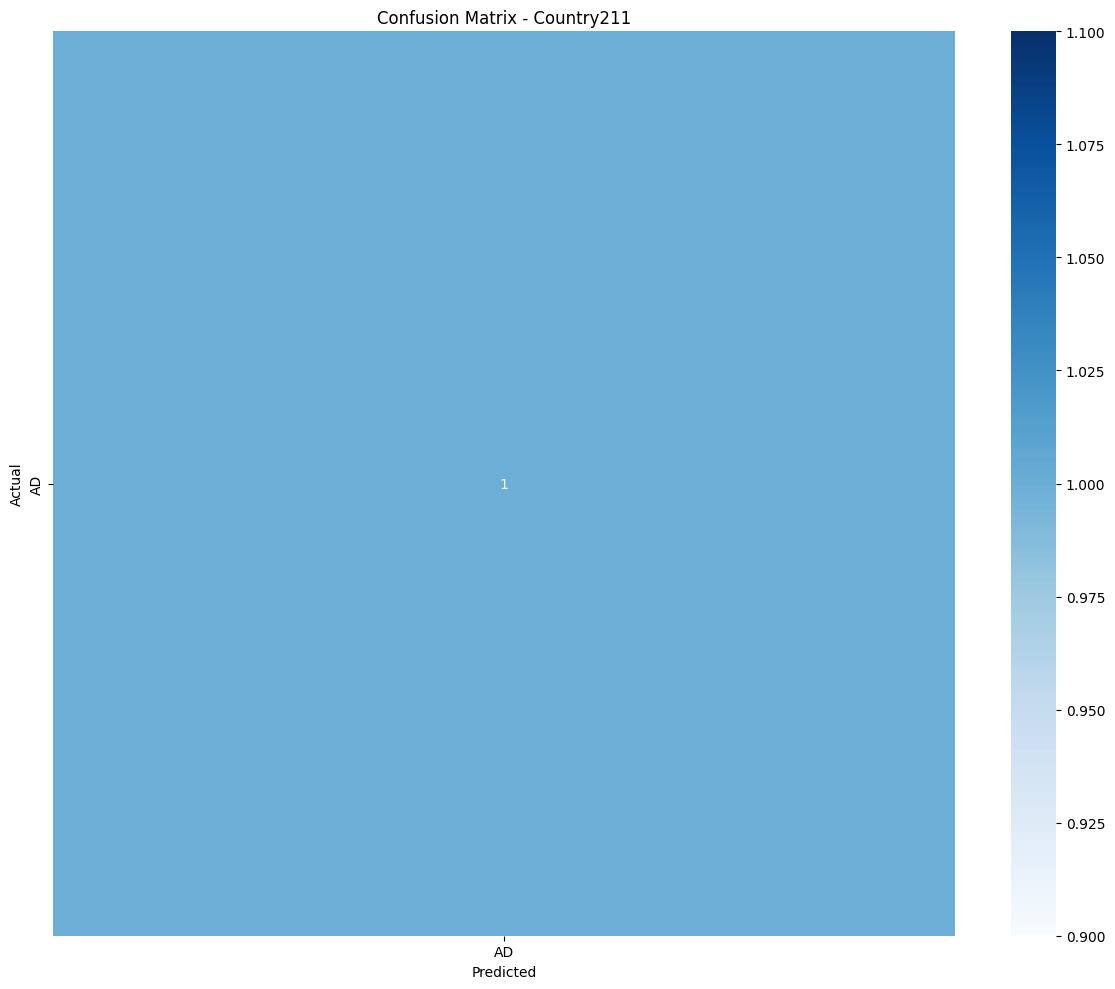

In [29]:
#Calling plot confusion matrix for only images we have tested it. - 30 images test it.
# Get the unique classes from the first 30 test samples
classes_to_display = []
for i in range(30):
    image, label = test_dataset[i]
    actual = test_dataset.classes[label]
    classes_to_display.append(actual)

# Remove duplicates
classes_to_display = list(set(classes_to_display))

# Call the function with the filtered classes
plot_confusion_matrix(model, test_loader, test_dataset.classes, device, display_classes=classes_to_display)

# Task
Improve the accuracy of the image classification model on the Country211 dataset to 90%.

## Data augmentation

### Subtask:
Implement data augmentation techniques to increase the size and variability of the training dataset, which can help the model generalize better.


**Reasoning**:
Define new transformations for the training dataset including augmentation and apply them.



In [1]:
# Define transformations with data augmentation for the training dataset
train_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),
    transforms.ToTensor()
])

# Define transformations for the test dataset (no augmentation)
test_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])

# Load the Country211 Dataset with the new transformations
train_dataset = Country211(root='./data', split='train', transform=train_transform, download=True)
test_dataset = Country211(root='./data', split='test', transform=test_transform)

# Optimized DataLoader
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True,
                          num_workers=4, pin_memory=True)
test_loader = DataLoader(test_dataset, batch_size=32)

NameError: name 'transforms' is not defined

**Reasoning**:
The previous command failed because `transforms` was not imported in that cell. Import `transforms` from `torchvision` and then define and apply the transformations with data augmentation to the training dataset.



In [2]:
from torchvision import transforms

# Define transformations with data augmentation for the training dataset
train_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),
    transforms.ToTensor()
])

# Define transformations for the test dataset (no augmentation)
test_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])

# Load the Country211 Dataset with the new transformations
train_dataset = Country211(root='./data', split='train', transform=train_transform, download=True)
test_dataset = Country211(root='./data', split='test', transform=test_transform)

# Optimized DataLoader
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True,
                          num_workers=4, pin_memory=True)
test_loader = DataLoader(test_dataset, batch_size=32)

NameError: name 'Country211' is not defined

**Reasoning**:
The previous command failed because `Country211` and `DataLoader` were not imported in that cell. Import `Country211` and `DataLoader` from their respective modules, then define and apply the transformations with data augmentation to the training dataset and load the datasets using the defined transformations.



In [3]:
from torchvision.datasets import Country211
from torch.utils.data import DataLoader

# Define transformations with data augmentation for the training dataset
train_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),
    transforms.ToTensor()
])

# Define transformations for the test dataset (no augmentation)
test_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])

# Load the Country211 Dataset with the new transformations
train_dataset = Country211(root='./data', split='train', transform=train_transform, download=True)
test_dataset = Country211(root='./data', split='test', transform=test_transform)

# Optimized DataLoader
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True,
                          num_workers=4, pin_memory=True)
test_loader = DataLoader(test_dataset, batch_size=32)

100%|██████████| 11.0G/11.0G [21:15<00:00, 8.62MB/s]
/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


## Data augmentation

### Subtask:
Implement data augmentation techniques to increase the size and variability of the training dataset, which can help the model generalize better.

**Reasoning**:
Define new transformations for the training dataset including augmentation and apply them.

In [ ]:
from torchvision.datasets import Country211
from torchvision import transforms
from torch.utils.data import DataLoader

# Define transformations with data augmentation for the training dataset
train_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),
    transforms.ToTensor()
])

# Define transformations for the test dataset (no augmentation)
test_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])

# Load the Country211 Dataset with the new transformations
train_dataset = Country211(root='./data', split='train', transform=train_transform, download=True)
test_dataset = Country211(root='./data', split='test', transform=test_transform)

# Optimized DataLoader
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True,
                          num_workers=4, pin_memory=True)
test_loader = DataLoader(test_dataset, batch_size=32)